In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [31]:
coursera=pd.read_csv("coursea_data.csv")
coursera = pd.DataFrame(coursera)

In [32]:
#   print the 15 rows of the dataset

coursera.head(15)


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


In [33]:
# Understanding the data
coursera.describe(include=['object']).T


,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487
course_students_enrolled,891,205,120k,22


In [34]:
coursera.describe()


,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


In [35]:
coursera=coursera.drop("Unnamed: 0",axis=1)


In [36]:
coursera.rename(columns = {'course_Certificate_type':'Certficate type'}, inplace = True)
coursera

,course_title,course_organization,Certficate type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


In [37]:
#Extracting numerical values in column course student enrolled with removing k : using it futher

coursera_new=coursera.copy()

In [38]:
def course_students_enrolled_modifier(x):
    return x[:-2]

In [39]:
coursera_new['course_students_enrolled_modified']=coursera_new['course_students_enrolled'].apply(course_students_enrolled_modifier)
coursera_new['course_students_enrolled_modified']=coursera_new['course_students_enrolled_modified'].apply(pd.to_numeric)
coursera_new =coursera_new.drop(['course_students_enrolled'],axis=1)
coursera_new

,course_title,course_organization,Certficate type,course_rating,course_difficulty,course_students_enrolled_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,13.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,9.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,32.0
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,5.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,2.0
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,3.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.0


In [40]:
def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Intermediate":
        return "1"
    elif x=="Mixed":
        return "0.5"
    elif x=="Advanced":
        return "2"
    else:
        return "0" 

In [41]:
coursera_new['course_difficulty_modified']=coursera_new['course_difficulty'].apply(course_difficulty_modifier)
coursera_new['course_difficulty_modified']=coursera_new['course_difficulty_modified'].apply(pd.to_numeric)
coursera_new =coursera_new.drop(['course_difficulty'],axis=1)
coursera_new

,course_title,course_organization,Certficate type,course_rating,course_students_enrolled_modified,course_difficulty_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,5.0,0.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,1.0,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,13.0,0.5
3,A Law Student's Toolkit,Yale University,COURSE,4.7,9.0,0.5
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,32.0,0.5
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,5.0,1.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,2.0,0.5
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,3.0,1.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,9.0,1.0


In [42]:
rating_sum = coursera['course_rating'].sum()
rating_mean = coursera['course_rating'].mean()
rating_median = coursera['course_rating'].median()
rating_min = coursera['course_rating'].min()
rating_max = coursera['course_rating'].max()

In [43]:
print(f'Sum: {rating_sum}, Mean: {rating_mean}, Median: {rating_median}, Min: {rating_min}, Max: {rating_max}')

Sum: 4167.5, Mean: 4.677328843995511, Median: 4.7, Min: 3.3, Max: 5.0


In [44]:
coursera_numaric=coursera_new.select_dtypes(include=np.number)


In [45]:
correlation = coursera_numaric.corr()
correlation


,course_rating,course_students_enrolled_modified,course_difficulty_modified
course_rating,1.000000,0.015848,-0.089810
course_students_enrolled_modified,0.015848,1.000000,-0.011345
course_difficulty_modified,-0.089810,-0.011345,1.000000


In [46]:
coursera_new_2 = coursera_new.groupby("course_organization")[["course_students_enrolled_modified", 'course_rating']].agg({"course_students_enrolled_modified":'size',"course_students_enrolled_modified":'mean','course_rating':'mean'}).reset_index()

In [47]:
coursera_new['overall_rating']=(coursera_new['course_students_enrolled_modified']/coursera_new['course_students_enrolled_modified'].max())*3+(coursera_new['course_rating']/coursera_new['course_rating'].max())*7
coursera_new=coursera_new.sort_values(by='overall_rating',ascending=False)

In [48]:
coursera_new.overall_rating.describe().T


count    881.000000
mean       6.856354
std        0.452615
min        5.126024
25%        6.616145
50%        6.792289
75%        6.986747
max        9.466988
Name: overall_rating, dtype: float64

In [49]:
coursera_best=coursera_new[coursera_new['overall_rating']>=8.5]
coursera_best

,course_title,course_organization,Certficate type,course_rating,course_students_enrolled_modified,course_difficulty_modified,overall_rating
261,English for Career Development,University of Pennsylvania,COURSE,4.8,76.0,0.5,9.466988
765,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,75.0,0.5,9.430843
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,83.0,0.0,9.300000
211,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,69.0,1.0,9.213976
626,Neural Networks and Deep Learning,deeplearning.ai,COURSE,4.9,63.0,1.0,9.137108
199,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,74.0,0.0,9.114699
129,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,79.0,0.0,9.015422
426,Improve Your English Communication Skills,Georgia Institute of Technology,SPECIALIZATION,4.7,61.0,0.0,8.784819
18,Academic English: Writing,"University of California, Irvine",SPECIALIZATION,4.7,54.0,0.0,8.531807


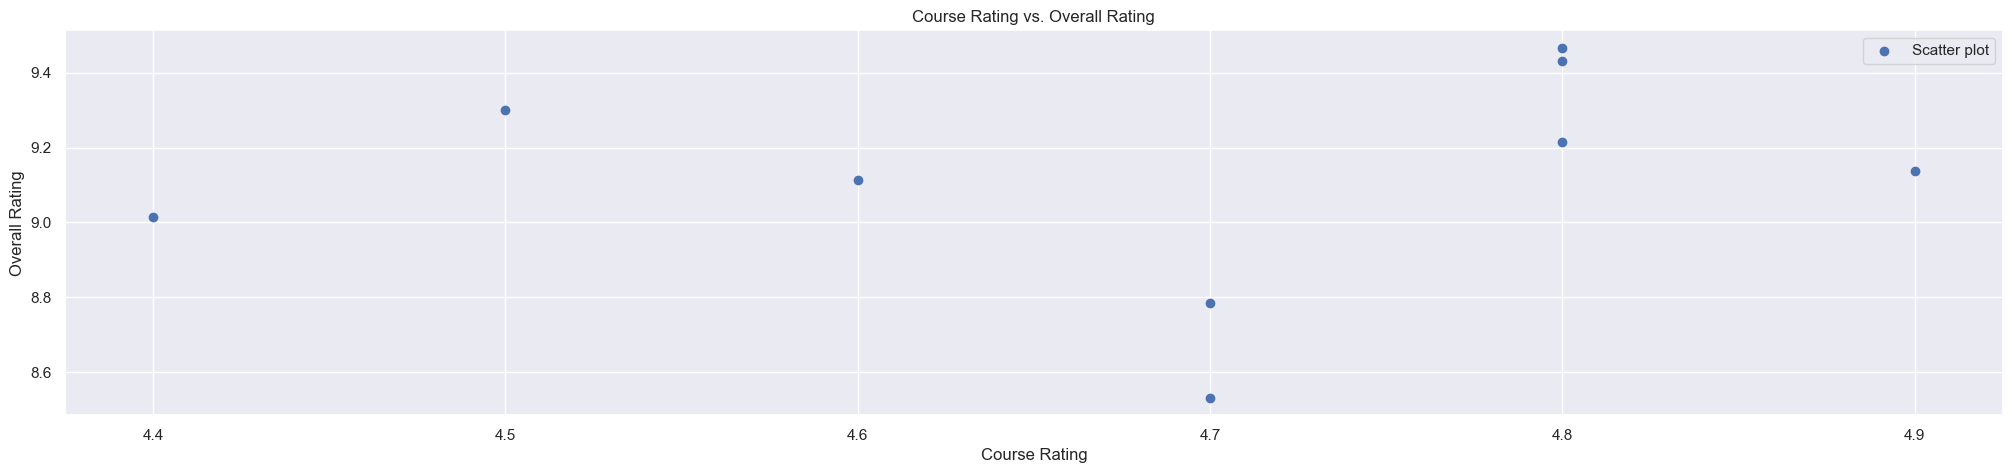

In [50]:
fig, ax = plt.subplots()

ax.scatter(coursera_best['course_rating'], coursera_best['overall_rating'])

ax.set_xlabel('Course Rating')
ax.set_ylabel('Overall Rating')
ax.set_title('Course Rating vs. Overall Rating')

ax.legend(['Scatter plot'])

plt.show()

In [51]:
coursera_best_copy = coursera_best.copy()

<Axes: >

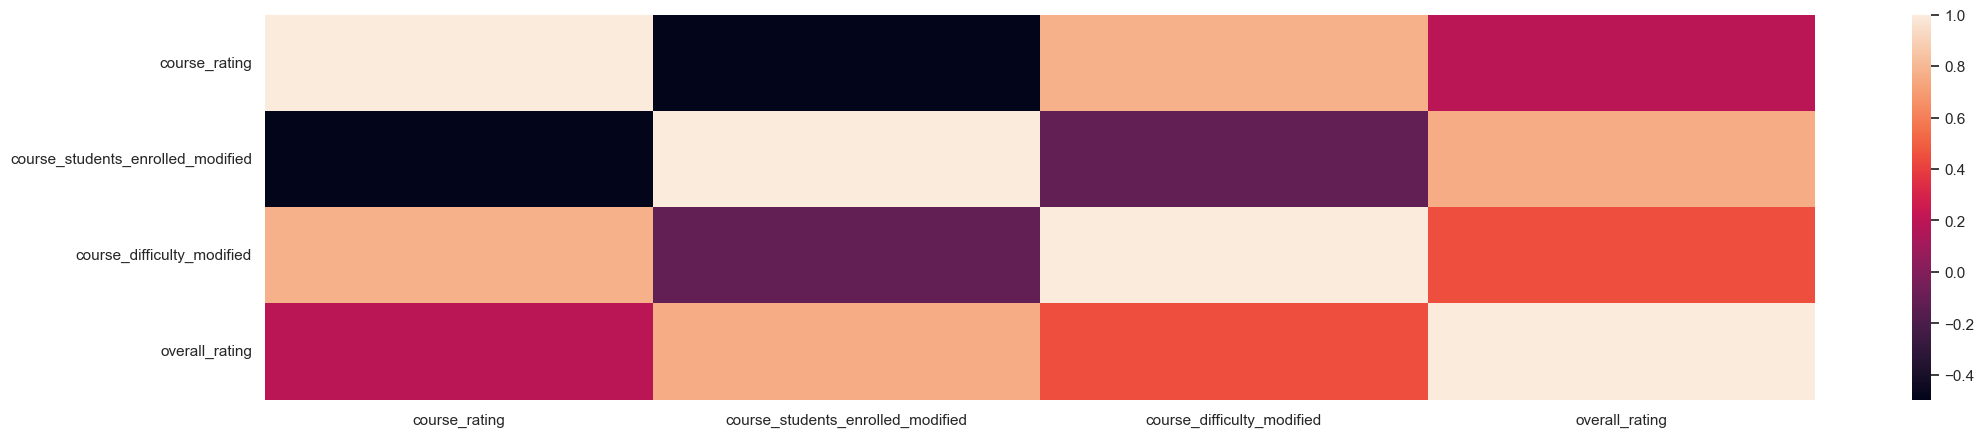

In [52]:
# Modeling

# Drop non-numeric columns or select only numeric columns
numeric_data = coursera_best_copy.select_dtypes(include=[np.number])

# Calculating the correlations
corr = numeric_data.corr()

# Plotting the correlations using a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


Text(0.5, 1.0, '\nBest course providers\n\n')

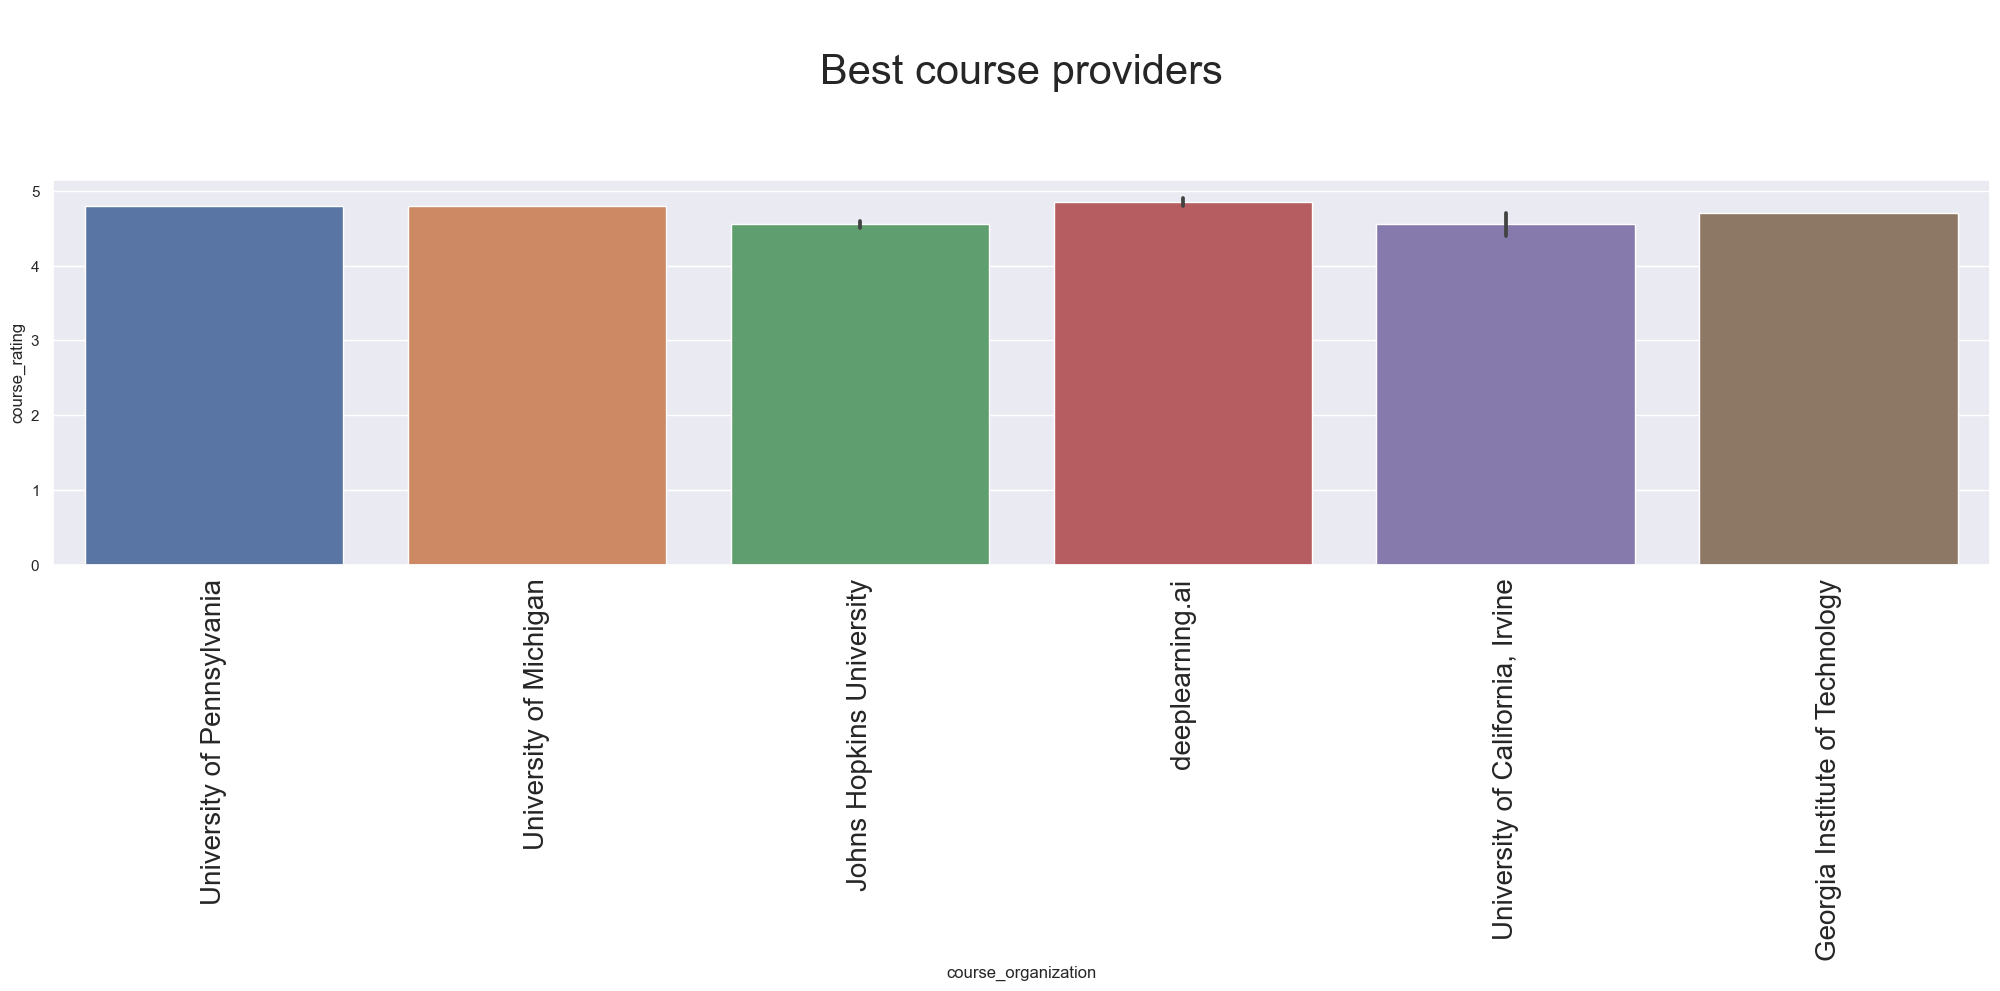

In [53]:
sns.set(rc={'figure.figsize':(25,5)})
plt.xticks(fontsize=20,rotation='vertical')
p=sns.barplot(x='course_organization',y="course_rating",data=coursera_best,hue_order=coursera_new['overall_rating'])
p.axes.set_title("\nBest course providers\n\n",fontsize=30)

In [54]:
#The score method for a regression model returns the coefficient of determination (R^2), 
 # which is a measure of how well the model fits the data. A value of 1.0 

# The mean absolute error (MAE) is a measure of the difference between the predicted values and the true values. 
# It is calculated as the average of the absolute errors between the predicted values and the true values. 
# In this case, the MAE for the linear regression model is calculated using the test data, 
# which is a sample of the data that was not used to train the model.
# The lower the MAE, the better the model's performance, as it indicates that the model is making predictions that are closer to the true values.

In [61]:
from sklearn.linear_model import Lasso

# Splitting the data into features and target
X = coursera_best_copy[['course_rating', 'course_students_enrolled_modified', 'course_difficulty_modified']]
y = coursera_best_copy['overall_rating']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength

# Training the model using the training data
lasso_model.fit(X_train, y_train)

# Predicting the target variable for the test data
y_pred = lasso_model.predict(X_test)

# Evaluating the model's performance
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.1824475190839694


In [62]:
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-Squared:", r2)

Mean Squared Error: 0.03682893709300887
Mean Absolute Error: 0.1824475190839694
R-Squared: 0.6470186645970306


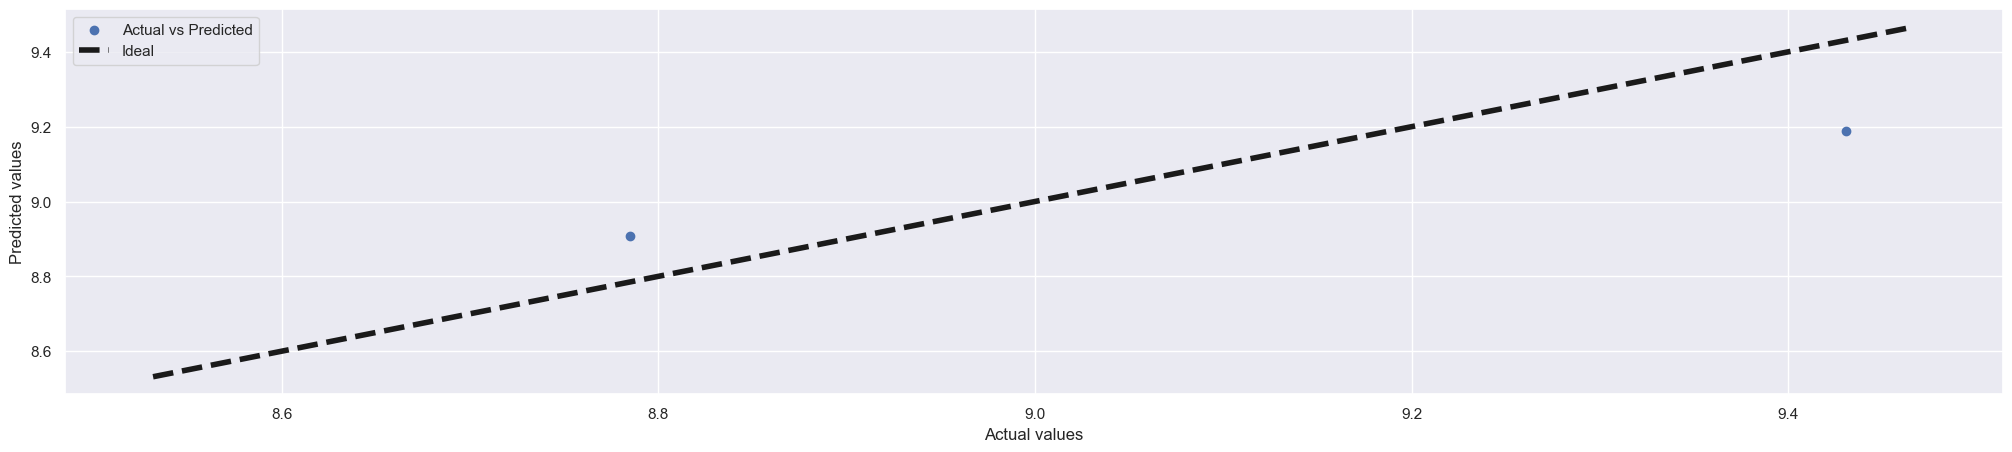

In [63]:
# Create the scatter plot
plt.scatter(y_test, y_pred, label="Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label="Ideal")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Add the legend
plt.legend()

plt.show()

In [66]:
# model = LinearRegression()
from sklearn.linear_model import Lasso
# Train the model
lasso_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuaracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [72]:
from sklearn.linear_model import Lasso

# Create the Lasso model with a higher alpha value for stronger regularization
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha value as needed

# Train the model
lasso_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lasso_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = lasso_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8421004542691212
